![](ML.png)

# 1. Prémisses de l'analyse de régression :

## . a Qu'est-ce que l'intelligence artificielle :
L'IA est une science multidisciplinaire composée d'informatique, de mathématiques (calcul et statistiques), d'électronique, de neurosciences... qui vise à résoudre des problèmes de manière similaire à celle des humains.

# 1. b Qu'est-ce que l'apprentissage automatique ? :
- L'apprentissage automatique (ML) fait partie de l'IA
- La capacité d'un algorithme informatique à apprendre des motifs dans les données sans être explicitement programmé. En effet, le ML est l'un des moyens les plus pratiques pour implémenter l'intelligence artifitraditionnel ne peut pas détecter.


![](MLstructure.png) 

## 1. c Qu'est-ce qui peut être considéré comme des données en apprentissage automatique ?
Les données peuvent être n'importe quoi en apprentissage automatique, nous pouvons avoir : **données structurées** et **données non structurées**
  
- 1.1. **Données structurées** : feuille de calcul Excel, tout type de données tabulaires, cela peut être catégoriel ou numérique.
- 1.2. **Données non structurées** : vidéos, audios, images, textes...

Flux de travail en apprentissage automatique :

> 1. Nettoyage des données
> 2. Conversion des données en représentation numérique
> 3. Construction d'un modèle pour apprendre les motifs dans ces données numériques
> 4. Prédiction sur des donées non vues

## 1. d Qu'est-ce que la régression <b>🤔</b> ?
> - En apprentissage automatique, en statistique et en science des données, la régression est une technique qui consiste à analyser et modéliser les relations entre les variables : En gros, nous essayons de prédire une variable (Y) en fonction d'autres variables (Xs) !

> - avec **y** comme variable dépendante et **Xs** comme variables indépendantes -> Ici, nous visons la causalité : Modélisation prédictive.
> - En gros, nous essayons de faire une analyse de corrélation entre les variables >- Etude d'unetif dans nos données est une formule ty,pique de régression linéaire d'une ligne droite : Soit>y = ax + ong> nomons <b>a</b>etebe poid(erreur)s et <b>b</b> comme le biais : et tous deux seront >- appelés <b>paramètres</b>.

Voici la formulation de l'équation : <b>y = 0.7x + 0.3</b>,
où le poids (pente) est 0.7 et e biais (erreur) = 0.3.

## 1. e Qu'est-ce que les réseaux de neurones artificiels <b>🤔</b> ?

- Les réseaux neuronaux (NN) sont des modèles computationnels inspirés de la structure du cerveau humain, et ont pour but d'apprendre des représentations numériques au sein des données.
- Les réseaux neuronaux sont les piliers de l'apprentissage profond (Deep Learning).
- L'apprentissage profond est un type d'apprentissage automatique capable d'apprendre des motifs complexes dans les données que l'apprentissage automatique traditionnel ne peut pas détecter.
e traditionnel ne peut pas détecter.

![](NN.jpg) 

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
#creating *known* parameters
weight = 0.7
bias = 0.3

# creating our data
start = 0
end = 2
# ax + b = c

step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

In [3]:
len(y),len(X), X[:10],y[:10]

(100,
 100,
 tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

# 2. Division de nos données en ensembles d'entraînement et de test
- 80% ensemble d'entraînement
- 20% ensemble de tet


![](tts.png)

In [4]:
train_proportion = int(len(X) * 0.8)
train_proportion

# training set
X_train,y_train = X[:train_proportion], y[:train_proportion]

# testing_set
X_test,y_test =  X[train_proportion:], y[train_proportion:]

len(X_train), len(y_train), len(X_test),len(y_test)

(80, 80, 20, 20)

# 3. Création d'une visualisation de nos données


In [5]:
def data_visualizer(train_data = X_train,
                   train_labels = y_train,
                   test_data = X_test,
                   test_labels = y_test,
                   predicted = None):

  plt.figure(figsize=(7,5))

  # Training scatter plot
  plt.scatter(train_data,train_labels, c ='b', s=4, label='Training data')
  
  # Tesing scatter plot
  plt.scatter(test_data, test_labels, c='g', s=4, label='Testing data')

  if predicted is not None:
    # Tesing scatter plot
    plt.scatter(test_data, predicted, c='r', s=4, label='Predictions')
      
  plt.xlabel("X-axis (Independent variable)")
  plt.ylabel("Y-axis (Dependent variable)")
  plt.legend(title ="Nomenclature")
  


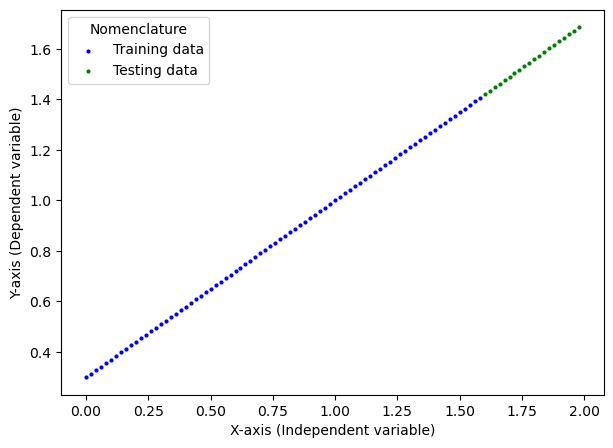

In [6]:
data_visualizer(X_train,y_train)

# 4. CRÉATION DU PREMIER MODÈLE DE RÉSEAU NEURONAL LINÉAIRE
Que fait votre modèle ?
> - Commencer avec des paramètres aléatoires (poids et biais)
> - Examiner les données d'entraînement pour ajuster les poids et les biais (paramètres) afin de se rapprocher des valeurs idéales

Comment fait-il cela ?
> Grâce à deux algorithmes :
- Rétropropagation
- Descente de radient


  ![](FFNN.jpeg) 

ax + b = c
a=0.7
b=0.3
x=10
c=7.3

Taux derreur = 7.3-3=4

In [8]:
# Setting seed for repeatability of experimentation
torch.manual_seed(seed = 12)

class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,
                                            requires_grad = True,
                                            dtype = torch.float))

    self.bias = nn.Parameter(torch.randn(1,             
                                         requires_grad=True,
                                         dtype = torch.float))


  # Defining model computation shame
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias

In [9]:
# instantiating our model
model = LinearRegression()

# Printing the model's parameters
model.weight,model.bias

(Parameter containing:
 tensor([-0.2138], requires_grad=True),
 Parameter containing:
 tensor([-1.3780], requires_grad=True))

# 5. Fonction de perte et optimiseur

## 5.1: Qu'est-ce que l'optimisation en apprentissage automatique ?
- L'optimisation est une technique d'ajustement des paramètres du modèle pour atteindre une convergence plus rapide.

## 5.2: Qu'est-ce que la descente de gradient ?
- La descente de gradient (GD) est l'un des algorithmes d'optimisation les plus utilisés en apprentissage automatique. Imaginez que vous travaillez sur un terrain vallonné et que vous souhaitez atteindre la vallée le plus rapidement possible. La descente de gradient ajuste itérativement les paramètres du modèle dans la direction qui minimisera **la fonction de coût (perte)**.

En pratique, nous avons :
- **Fonction de perte** : Cela aide à évaluer la qualité de nos prédictions par rapport à la vérité terrain.
- **Optimiseur** : Celui-ci prend en compte la perte pour optimiser les paramètres u modèle.


In [10]:
# Definning the loss function
loss_fn = nn.L1Loss()

# Defining the optimizer
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.01, momentum =0.9)

![](MAE.png) 

In [11]:
model.weight,model.bias

(Parameter containing:
 tensor([-0.2138], requires_grad=True),
 Parameter containing:
 tensor([-1.3780], requires_grad=True))

# 6. Prédiction naïve :
- Essayons une prédiction naïve sur nos données de test
- Tracer les prédictions pour voir à quel point elles convergent avec la **vérité terrain*


In [12]:
preds = model(X_test)
preds

tensor([[-1.7201],
        [-1.7243],
        [-1.7286],
        [-1.7329],
        [-1.7372],
        [-1.7414],
        [-1.7457],
        [-1.7500],
        [-1.7543],
        [-1.7586],
        [-1.7628],
        [-1.7671],
        [-1.7714],
        [-1.7757],
        [-1.7799],
        [-1.7842],
        [-1.7885],
        [-1.7928],
        [-1.7970],
        [-1.8013]], grad_fn=<AddBackward0>)

In [19]:
# Let us ploat the prediction
# data_visualizer(test_data = X_test, test_labels = y_test, predicted = preds.detach().numpy())

# 7. Boucle d'entraînement
#### 7.1 Boucle d'entraînement manuelle
> Ici, nous essayons de démontrer comment le modèle ajuste les paramètres en fonction de la valeur de perte pour chaque itération (époque.


In [20]:
epoch = 80
for e in range(epoch):
    # Step 0 Setting the loop mode:
    model.train()

     # Step 3 downgrading the gradiant to zero with the optimizer opbject
    optimizer.zero_grad()

    # Step 1 Forward pass
    preds = model(X_train)

    # Step 2 Loss value computation
    loss = loss_fn(preds,y_train)
    print(f'Epoch {e} val_loss: {loss:.4f}')


    # Step 4 Backward pass/propagation
    loss.backward()

    # Step 5 Gradient descent 
    optimizer.step()


Epoch 0 val_loss: 0.2910
Epoch 1 val_loss: 0.1446
Epoch 2 val_loss: 0.1019
Epoch 3 val_loss: 0.1606
Epoch 4 val_loss: 0.2421
Epoch 5 val_loss: 0.3179
Epoch 6 val_loss: 0.3741
Epoch 7 val_loss: 0.4084
Epoch 8 val_loss: 0.4230
Epoch 9 val_loss: 0.4200
Epoch 10 val_loss: 0.4010
Epoch 11 val_loss: 0.3676
Epoch 12 val_loss: 0.3214
Epoch 13 val_loss: 0.2639
Epoch 14 val_loss: 0.2016
Epoch 15 val_loss: 0.1427
Epoch 16 val_loss: 0.0972
Epoch 17 val_loss: 0.0790
Epoch 18 val_loss: 0.1047
Epoch 19 val_loss: 0.1520
Epoch 20 val_loss: 0.1790
Epoch 21 val_loss: 0.1870
Epoch 22 val_loss: 0.1780
Epoch 23 val_loss: 0.1537
Epoch 24 val_loss: 0.1156
Epoch 25 val_loss: 0.0712
Epoch 26 val_loss: 0.0593
Epoch 27 val_loss: 0.0703
Epoch 28 val_loss: 0.0874
Epoch 29 val_loss: 0.1000
Epoch 30 val_loss: 0.1030
Epoch 31 val_loss: 0.0945
Epoch 32 val_loss: 0.0757
Epoch 33 val_loss: 0.0510
Epoch 34 val_loss: 0.0303
Epoch 35 val_loss: 0.0372
Epoch 36 val_loss: 0.0547
Epoch 37 val_loss: 0.0542
Epoch 38 val_loss: 0.0

In [ ]:
fdsf

In [21]:
model.weight,model.bias

(Parameter containing:
 tensor([0.7096], requires_grad=True),
 Parameter containing:
 tensor([0.3085], requires_grad=True))

# Ploating the prediction 

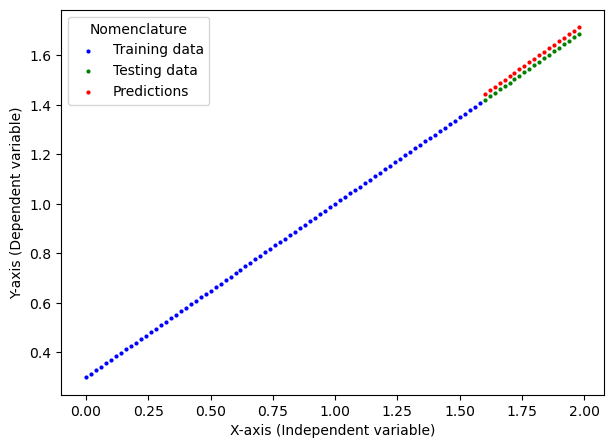

In [22]:
preds = model(X_test)
# Let us ploat the prediction
data_visualizer(test_data = X_test, test_labels = y_test, predicted = preds.detach().numpy())

In [23]:
model.weight,model.bias

(Parameter containing:
 tensor([0.7096], requires_grad=True),
 Parameter containing:
 tensor([0.3085], requires_grad=True))

# B. USING BUILT IN LINEAR MODEL

# B.1 Model definition

In [24]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_model = nn.Linear(in_features = 1,
                                     out_features = 1)

    def  forward(self, x: torch.Tensor()) ->  torch.Tensor:
        return self.linear_model(x)

# B.2 Indépendance du dispositif :
> - Ici, nous essayons de vérifier le matériel utilisé afin que notre modèle puisse s'exécuter sur le matériel disponible.
> - Par conséquent, les données et le modèle sont envoyés sur le dispositi.


In [25]:
# Device agnostic
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# device agnostic for our data
X_train,X_test,y_train,y_test = X_train.to(device),X_test.to(device),y_train.to(device),y_test.to(device)

# B.3 Loss function and optimizer definintion

In [26]:
# Instantiating our model
model_v2 = LinearRegressionModelV2()

# Device aagnostic for our model
model_v2.to(device)

# Cost function: this determine how good is our model
loss_fn = nn.L1Loss()

# Optimize: the target is to minimize the loss 
optimizer = torch.optim.SGD(params = model_v2.parameters(), lr = 0.01)

# B.4 Pytorch training loop

In [27]:
# Model passing through all the data sample
epoch  = 200

# Trainign loop:
for e in range(epoch):

    model.train()
    # 1. predict on the xtest or Forward pass
    preds = model_v2(X_train)

    # 2 . loss calculation
    loss = loss_fn(preds,y_train)

    # 3. ZZero grading the optimizer
    optimizer.zero_grad()

    # 4. Backward propagation
    loss.backward()

    # gradient descent
    optimizer.step()

    # Switching to evaluation mode
    model.eval()

    # Evaluating the model on test dataset
    with torch.inference_mode():

        # predicting on test dataset
        test_preds = model_v2(X_test)

        # Evaluating on test data
        loss_eval = loss_fn(test_preds,y_test)

        # Printing the loss every ten epoch
        if e % 5 == 0:
            print(f'Training loss: {loss.detach().numpy():.2f} || Evaluation loss: {loss_eval.detach().numpy():.2f}')
        


Training loss: 1.74 || Evaluation loss: 2.60
Training loss: 1.66 || Evaluation loss: 2.48
Training loss: 1.58 || Evaluation loss: 2.36
Training loss: 1.50 || Evaluation loss: 2.24
Training loss: 1.42 || Evaluation loss: 2.12
Training loss: 1.34 || Evaluation loss: 2.00
Training loss: 1.26 || Evaluation loss: 1.88
Training loss: 1.17 || Evaluation loss: 1.76
Training loss: 1.09 || Evaluation loss: 1.64
Training loss: 1.01 || Evaluation loss: 1.52
Training loss: 0.93 || Evaluation loss: 1.39
Training loss: 0.85 || Evaluation loss: 1.27
Training loss: 0.77 || Evaluation loss: 1.15
Training loss: 0.69 || Evaluation loss: 1.03
Training loss: 0.61 || Evaluation loss: 0.91
Training loss: 0.52 || Evaluation loss: 0.79
Training loss: 0.44 || Evaluation loss: 0.67
Training loss: 0.36 || Evaluation loss: 0.55
Training loss: 0.28 || Evaluation loss: 0.43
Training loss: 0.20 || Evaluation loss: 0.31
Training loss: 0.12 || Evaluation loss: 0.19
Training loss: 0.04 || Evaluation loss: 0.07
Training l

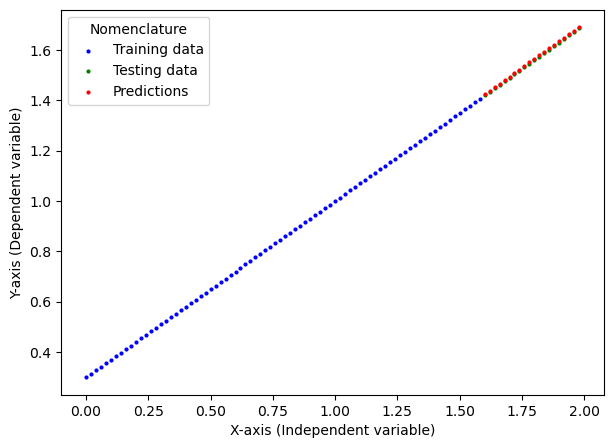

In [28]:
preds = model_v2(X_test)
# Let us ploat the prediction
data_visualizer(test_data = X_test, test_labels = y_test, predicted = preds.detach().numpy())

# B.5 Création d'un nouveau dossier pour enregistrer le modèle


In [ ]:
import os
model_v2.state_dict()

if not os.path.exists('./models'):
    os.makedirs('./models')

path = os.path.join('./models','linear_regressioinV2.pt')
path 

# B.6 Enregistrement du model

In [ ]:
# Saving the model
torch.save(model_v2,f= path)

# B.7 Faire appel au model

In [ ]:
# Loading the saved model
loaded_model = torch.load(path)

In [ ]:
loaded_model.state_dict()

In [ ]:
model_v2,loaded_model

# B.9 Predire avec le model

In [ ]:
new_data = torch.arange(2.02,3,step).unsqueeze(dim=1)
ground_truth = 0.7*new_data + 0.3

In [ ]:
# Predicting on new data
with torch.no_grad():
    predictions = loaded_model(new_data)

In [ ]:
predictions[:5]

In [ ]:
# computing the expected output of the first element of the unseen data
0.7*2.02 + 0.3,predictions[:1]

In [ ]:
new_loss = torch.nn.L1Loss()

In [ ]:
print(f"The Mean absolute error on unseen data is: {float(new_loss(predictions,ground_truth)):.5f}")

# THANK YOU FOR ATTENDING THE WEBINAIRE